* Objective: the key factor for a manga to be successful
* Definition of Success:
    * Commercial: Animated or not
    * Literature: Rated higher than third quartile
    * Popularity: Rated_by higher than third quartile
* Features:
    * Genre
    * Theme
    * Demographic
    * Serialization 
* Tasks to do:
    - [x] Split multiple categories
    - [x] Create new columns **Animated or not**
    - [x] Time series exploration **Other media's competition with manga**
    - [x] Definition of genre and theme, and the difference between them
    - [x] Understanding of serialization (e.g., sales, periodicity, publisher)
* Data Availability:
    * last update: 28th Dec 2024

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import ast

pd.set_option('display.precision', 2)
plt.style.use('style.mplstyle')
np.bool = np.bool_

## Loading Data

In [2]:
manga = pd.read_csv('manga_241228.csv', index_col=0)
manga.head()

,url,images,approved,titles,title,title_english,title_japanese,title_synonyms,type,chapters,...,synopsis,background,authors,serializations,genres,explicit_genres,themes,demographics,relations,external
mal_id,,,,,,,,,,,,,,,,,,,,,
1,https://myanimelist.net/manga/1/Monster,{'jpg': {'image_url': 'https://cdn.myanimelist...,True,"[{'type': 'Default', 'title': 'Monster'}, {'ty...",Monster,Monster,MONSTER,[],Manga,162.0,...,"Kenzou Tenma, a renowned Japanese neurosurgeon...",Monster won the Grand Prize at the third Tezuk...,"[{'mal_id': 1867, 'type': 'people', 'name': 'U...","[{'mal_id': 1, 'type': 'manga', 'name': 'Big C...","[{'mal_id': 46, 'type': 'manga', 'name': 'Awar...",[],"[{'mal_id': 50, 'type': 'manga', 'name': 'Adul...","[{'mal_id': 41, 'type': 'manga', 'name': 'Sein...","[{'relation': 'Adaptation', 'entry': [{'mal_id...","[{'name': 'Wikipedia', 'url': 'https://en.wiki..."
2,https://myanimelist.net/manga/2/Berserk,{'jpg': {'image_url': 'https://cdn.myanimelist...,True,"[{'type': 'Default', 'title': 'Berserk'}, {'ty...",Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],Manga,NaN,...,"Guts, a former mercenary now known as the Blac...",Berserk won the Excellence Award at the sixth ...,"[{'mal_id': 1868, 'type': 'people', 'name': 'M...","[{'mal_id': 2, 'type': 'manga', 'name': 'Young...","[{'mal_id': 1, 'type': 'manga', 'name': 'Actio...",[],"[{'mal_id': 58, 'type': 'manga', 'name': 'Gore...","[{'mal_id': 41, 'type': 'manga', 'name': 'Sein...","[{'relation': 'Adaptation', 'entry': [{'mal_id...","[{'name': 'Official Site', 'url': 'https://mag..."
3,https://myanimelist.net/manga/3/20th_Century_Boys,{'jpg': {'image_url': 'https://cdn.myanimelist...,True,"[{'type': 'Default', 'title': '20th Century Bo...",20th Century Boys,20th Century Boys,20世紀少年,"['20 Seiki Shounen', 'Nijuu Seiki Shounen', 'N...",Manga,249.0,...,"As the 20th century approaches its end, people...",20th Century Boys won the Kodansha Manga Award...,"[{'mal_id': 1867, 'type': 'people', 'name': 'U...","[{'mal_id': 3, 'type': 'manga', 'name': 'Big C...","[{'mal_id': 46, 'type': 'manga', 'name': 'Awar...",[],"[{'mal_id': 13, 'type': 'manga', 'name': 'Hist...","[{'mal_id': 41, 'type': 'manga', 'name': 'Sein...","[{'relation': 'Sequel', 'entry': [{'mal_id': 7...","[{'name': 'Wikipedia', 'url': 'http://ja.wikip..."
4,https://myanimelist.net/manga/4/Yokohama_Kaida...,{'jpg': {'image_url': 'https://cdn.myanimelist...,True,"[{'type': 'Default', 'title': 'Yokohama Kaidas...",Yokohama Kaidashi Kikou,Yokohama Kaidashi Kikou,ヨコハマ買い出し紀行,"['Yokohama Shopping Log', 'Yokohama Shopping T...",Manga,142.0,...,In a post-apocalyptic world where an environme...,Yokohama Kaidashi Kikou won the Seiun Award fo...,"[{'mal_id': 1869, 'type': 'people', 'name': 'A...","[{'mal_id': 4, 'type': 'manga', 'name': 'After...","[{'mal_id': 46, 'type': 'manga', 'name': 'Awar...",[],"[{'mal_id': 63, 'type': 'manga', 'name': 'Iyas...","[{'mal_id': 41, 'type': 'manga', 'name': 'Sein...","[{'relation': 'Adaptation', 'entry': [{'mal_id...","[{'name': 'Wikipedia', 'url': 'http://ja.wikip..."
7,https://myanimelist.net/manga/7/Hajime_no_Ippo,{'jpg': {'image_url': 'https://cdn.myanimelist...,True,"[{'type': 'Default', 'title': 'Hajime no Ippo'...",Hajime no Ippo,Hajime no Ippo: Fighting Spirit!,はじめの一歩,"['The Fighting!', 'Fighting Spirit', 'The Figh...",Manga,NaN,...,Makunouchi Ippo is a 16-year-old high school s...,Hajime no Ippo won the 15th Kodansha Manga Awa...,"[{'mal_id': 1876, 'type': 'people', 'name': 'M...","[{'mal_id': 8, 'type': 'manga', 'name': 'Shoun...","[{'mal_id': 46, 'type': 'manga', 'name': 'Awar...",[],"[{'mal_id': 54, 'type': 'manga', 'name': 'Comb...","[{'mal_id': 27, 'type': 'manga', 'name': 'Shou...","[{'relation': 'Adaptation', 'entry': [{'mal_id...","[{'name': 'Official Site', 'url': 'https://sho..."


### Count the number of adaptations in the col adaptation

In [3]:
# Count the number of adaptations for each categories in the Adaptation column
adp_li = []
for relation in manga['relations']:
    relation_li = ast.literal_eval(relation)
    relation_dict = {}
    for rel in relation_li:
        relation_dict[rel['relation']] = 0
        type_dict = {}
        for adp in rel['entry']:
            if adp['type'] in type_dict:
                type_dict[adp['type']] += 1
            else:
                type_dict[adp['type']] = 1
        relation_dict[rel['relation']] = type_dict
    adp_li.append(relation_dict)

In [4]:
# Find the unique type of columns and rows
cols = []
for adp in adp_li:
    for k in adp.keys():
        if k not in cols:
            cols.append(k)
print(cols)

rows = []
for adp in adp_li:
    for v in adp.values():
        for key, value in v.items():
            if key not in rows:
                rows.append(key)
print(rows)

# Save data into df
mlvl_col = pd.MultiIndex.from_product([['Adaptation', 'Side Story', 'Spin-Off', 'Other', 'Sequel', 'Alternative Version', 'Character', 'Alternative Setting', 'Prequel', 'Parent Story', 'Full Story', 'Summary'],
                            ['anime', 'manga']])
df_adp = pd.DataFrame(index=manga.index, 
                      columns=mlvl_col)

counter = 0
for adp in adp_li:
    for k, v in adp.items():
        for key, value in v.items():
            df_adp.loc[manga.index[counter], (k, key)] = value
    counter += 1
df_adp

['Adaptation', 'Side Story', 'Spin-Off', 'Other', 'Sequel', 'Alternative Version', 'Character', 'Alternative Setting', 'Prequel', 'Parent Story', 'Full Story', 'Summary']
['anime', 'manga']


Adaptation       Side Story       Spin-Off       Other       Sequel  \
            anime manga      anime manga    anime manga anime manga  anime   
mal_id                                                                       
1               1   NaN        NaN     1      NaN   NaN   NaN   NaN    NaN   
2               7   NaN        NaN   NaN      NaN     1   NaN     1    NaN   
3             NaN   NaN        NaN     1      NaN     1   NaN   NaN    NaN   
4               2   NaN        NaN   NaN      NaN     1   NaN   NaN    NaN   
7               6   NaN        NaN   NaN      NaN   NaN   NaN   NaN    NaN   
...           ...   ...        ...   ...      ...   ...   ...   ...    ...   
148084        NaN   NaN        NaN   NaN      NaN   NaN   NaN   NaN    NaN   
148085        NaN   NaN        NaN   NaN      NaN   NaN   NaN   NaN    NaN   
148086        NaN   NaN        NaN   NaN      NaN   NaN   NaN   NaN    NaN   
148087        NaN   NaN        NaN   NaN      NaN   NaN   NaN   NaN    NaN   
148089        NaN   NaN        NaN   NaN      NaN   NaN   NaN   NaN    NaN   

              ... Alternative Setting       Prequel       Parent Story        \
       manga  ...               anime manga   anime manga        anime manga   
mal_id        ...                                                              
1        NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
2        NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
3          1  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
4        NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
7        NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
...      ...  ...                 ...   ...     ...   ...          ...   ...   
148084   NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
148085   NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
148086   NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
148087   NaN  ...                 NaN   NaN     NaN   NaN          NaN   NaN   
148089     1  ...                 NaN   NaN     NaN   NaN          NaN   NaN   

       Full Story       Summary        
            anime manga   anime manga  
mal_id                                 
1             NaN   NaN     NaN   NaN  
2             NaN   NaN     NaN   NaN  
3             NaN   NaN     NaN   NaN  
4             NaN   NaN     NaN   NaN  
7             NaN   NaN     NaN   NaN  
...           ...   ...     ...   ...  
148084        NaN   NaN     NaN   NaN  
148085        NaN   NaN     NaN   NaN  
148086        NaN   NaN     NaN   NaN  
148087        NaN   NaN     NaN   NaN  
148089        NaN   NaN     NaN   NaN  

[60509 rows x 24 columns]

In [5]:
df_adp.sum()

Adaptation           anime    7116
                     manga    1243
Side Story           anime       0
                     manga    1133
Spin-Off             anime       0
                     manga    1566
Other                anime       0
                     manga    1658
Sequel               anime       0
                     manga    2665
Alternative Version  anime       0
                     manga    4285
Character            anime       0
                     manga     311
Alternative Setting  anime       0
                     manga     539
Prequel              anime       0
                     manga    2697
Parent Story         anime       0
                     manga    2975
Full Story           anime       0
                     manga      15
Summary              anime       0
                     manga       1
dtype: object

### Create boolean column animated (or not)

### Format the content of the selected columns

In [6]:
def clean_mul_elements(col):
    elements_list = []
    for elements in manga[col]:
        element_list = []
        elements = ast.literal_eval(elements)
        for element in elements:
            element = element['name']
            element_list.append(element)
        elements_list.append(element_list)
    manga[col[:-1]] = elements_list
    return manga[col[:-1]]

clean_mul_elements('authors')
clean_mul_elements('genres')
clean_mul_elements('themes')
clean_mul_elements('demographics')
clean_mul_elements('serializations')

mal_id
1                [Big Comic Original]
2                      [Young Animal]
3                 [Big Comic Spirits]
4                         [Afternoon]
7         [Shounen Magazine (Weekly)]
                     ...             
148084                    [KakaoPage]
148085                    [KakaoPage]
148086         [Web Comic Gamma Plus]
148087                    [Manga UP!]
148089                  [Comic fleur]
Name: serialization, Length: 60509, dtype: object

In [7]:
from datetime import datetime
from_list = []
end_list = []
for date in manga['published']:
    date_json = ast.literal_eval(date)
    if date_json['from'] == None:
        beg = None
    else:
        beg = datetime.strptime(date_json['from'][:10], '%Y-%m-%d')
    if date_json['to'] == None:
        fin = None
    else:
        fin = datetime.strptime(date_json['to'][:10], '%Y-%m-%d')
    from_list.append(beg)
    end_list.append(fin)
manga['start_date'] = from_list
manga['end_date'] = end_list

In [8]:
adp_cnt_list = []
for rel in manga['relations']:
    rel = ast.literal_eval(rel)
    ani_adp_cnt = 0
    if rel == []:
        adp_cnt_list.append(ani_adp_cnt)
        continue
    for adp in rel[0]['entry']:
        if adp['type'] == 'anime':
            ani_adp_cnt += 1
    adp_cnt_list.append(ani_adp_cnt)
manga['animated_times'] = adp_cnt_list        

In [9]:
manga['animated'] = np.array([True if i > 0 else False for i in manga['animated_times']])

In [10]:
#get rid of the brackets and quotes
#serialization only store the current magazine it is in
manga['serialization'] = [ser[0] if ser else np.nan for ser in manga['serialization']]

In [11]:
needed_cols = ['title', 'title_english', 'title_japanese', 'title_synonyms','type',
 'chapters', 'volumes', 'status', 'publishing', 'score', 'scored', 'scored_by',
 'rank', 'popularity', 'members', 'favorites', 'start_date', 'end_date', 'genre',
 'theme', 'demographic', 'author', 'serialization',  'synopsis', 'background', 'animated_times', 'animated'
 ]
manga = manga[needed_cols]

In [12]:
dtype_list = ['string', 'string','string', 'object', 'category', 'float64', 'float64', 
              'category', 'boolean', 'float64', 'float64','float64', 'float64', 'int64', 
              'int64', 'int64', 'datetime64[ns]', 'datetime64[ns]',
              'object','object','object','object','object','object','object', 'int64']
column_list = manga.columns.to_list()
dtype_dict = dict(zip(column_list, dtype_list))
manga = manga.astype(dtype_dict)

#### Write a function to split the cells that contains multiple categories

In [13]:
def split_cells(col, prefix='cat'):
    #strip the bracket and quote
    # col = col.str[2:-2]
    # col = col.str.split("', '")
    cat_list = []
    #Turn the splitted cat list into Series and store them into a list
    for i in col:
        cat = pd.DataFrame(pd.Series(i, index=(range(1, len(i) + 1))))
        cat_list.append(cat)
    #merge them into a df
    cat_df = pd.concat(cat_list, axis=1)
    #Add id
    cat_df.columns = manga.index
    cat_df = cat_df.T
    cat_df = cat_df.add_prefix(prefix)
    cat_df = cat_df.replace([], np.nan)
    return cat_df

In [14]:
#create 3 df, might turn them to dummy variable for model building later
theme = split_cells(manga['theme'], prefix='theme_')
genre = split_cells(manga['genre'], prefix='genre_')
demo = split_cells(manga['demographic'], prefix='demo_')

### Combine the splitted columns back to the main table

In [15]:
#The number of manga with multiple demographics is limited
#Pick demo_1 as the representative (based on personal judgement) 
manga = manga.join([demo['demo_1'], genre, theme])
manga.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60509 entries, 1 to 148089
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           60509 non-null  string        
 1   title_english   21203 non-null  string        
 2   title_japanese  59552 non-null  string        
 3   title_synonyms  60509 non-null  object        
 4   type            60509 non-null  category      
 5   chapters        41753 non-null  float64       
 6   volumes         42420 non-null  float64       
 7   status          60509 non-null  category      
 8   publishing      60509 non-null  boolean       
 9   score           24952 non-null  float64       
 10  scored          24952 non-null  float64       
 11  scored_by       24952 non-null  float64       
 12  rank            50839 non-null  float64       
 13  popularity      60509 non-null  int64         
 14  members         60509 non-null  int64         
 15  favori

## EDA

### Descriptive

#### Descriptive Statistics

In [16]:
#check the numerical data's distribution by descriptive statistics
manga.describe(include=[np.number])

,chapters,volumes,score,scored,scored_by,rank,popularity,members,favorites,animated_times
count,41753.00,42420.00,24952.00,24952.00,24952.00,50839.00,60509.00,60509.00,60509.00,60509.00
mean,25.60,3.37,6.93,6.93,1948.43,25258.67,35105.48,2114.93,63.67,0.09
std,60.08,5.09,0.54,0.54,9772.95,14479.91,21957.82,12737.57,1178.65,0.46
min,1.00,1.00,2.44,2.44,100.00,1.00,1.00,2.00,0.00,0.00
25%,6.00,1.00,6.58,6.58,223.00,12812.50,15568.00,68.00,0.00,0.00
50%,10.00,2.00,6.90,6.90,464.00,25829.00,33387.00,243.00,0.00,0.00
75%,26.00,4.00,7.24,7.24,1170.00,37948.50,54583.00,1022.00,4.00,0.00
max,6477.00,200.00,9.47,9.47,416170.00,51466.00,73512.00,729891.00,131075.00,24.00


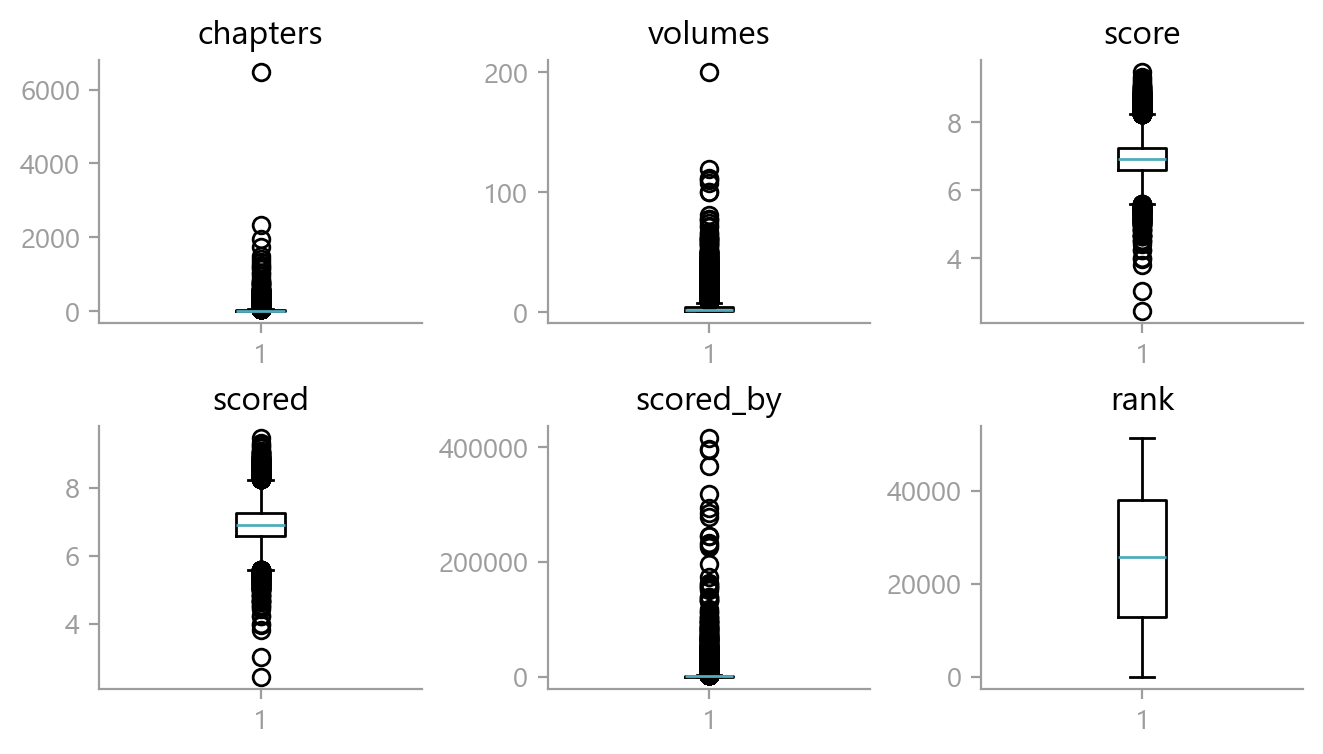

In [17]:
fig, axs = plt.subplots(2, 3, layout='constrained')
iloc_num = 0
manga_num = manga.select_dtypes(include=np.number)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].boxplot(manga_num.iloc[:, iloc_num].dropna())
        axs[i][j].set_title(manga_num.columns[iloc_num])
        iloc_num += 1

#### Correlation

In [18]:
manga_num = manga.select_dtypes(include=np.number)
manga_num.corr()

,chapters,volumes,score,scored,scored_by,rank,popularity,members,favorites,animated_times
chapters,1.00,0.74,0.23,0.23,0.20,-0.14,-0.14,0.21,0.16,0.24
volumes,0.74,1.00,0.35,0.35,0.29,-0.22,-0.23,0.29,0.21,0.31
score,0.23,0.35,1.00,1.00,0.28,-0.96,-0.48,0.34,0.21,0.25
scored,0.23,0.35,1.00,1.00,0.28,-0.96,-0.48,0.34,0.21,0.25
scored_by,0.20,0.29,0.28,0.28,1.00,-0.21,-0.24,0.98,0.90,0.26
rank,-0.14,-0.22,-0.96,-0.96,-0.21,1.00,0.73,-0.23,-0.10,-0.16
popularity,-0.14,-0.23,-0.48,-0.48,-0.24,0.73,1.00,-0.23,-0.08,-0.18
members,0.21,0.29,0.34,0.34,0.98,-0.23,-0.23,1.00,0.87,0.29
favorites,0.16,0.21,0.21,0.21,0.90,-0.10,-0.08,0.87,1.00,0.20
animated_times,0.24,0.31,0.25,0.25,0.26,-0.16,-0.18,0.29,0.20,1.00


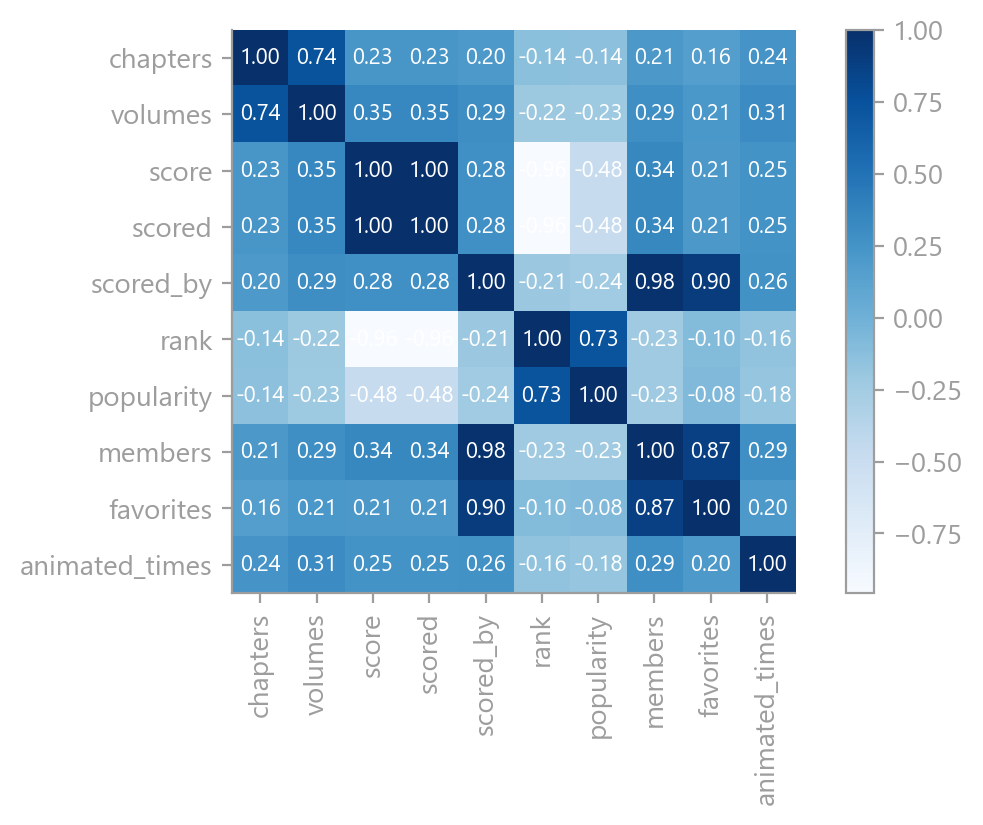

In [19]:
#Visualize the correlation by heatmap
fig, ax = plt.subplots()
df = manga_num.corr()
img = ax.imshow(df, cmap='Blues')
ax.set_xticks(range(df.shape[0]), labels=df.index, rotation='vertical')
ax.set_yticks(range(df.shape[1]), labels=df.columns)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        ax.text(j, i, f'{df.iloc[i, j]:.2f}', ha='center', va='center', c='w', fontsize=8)
fig.colorbar(img)

#### Distribution

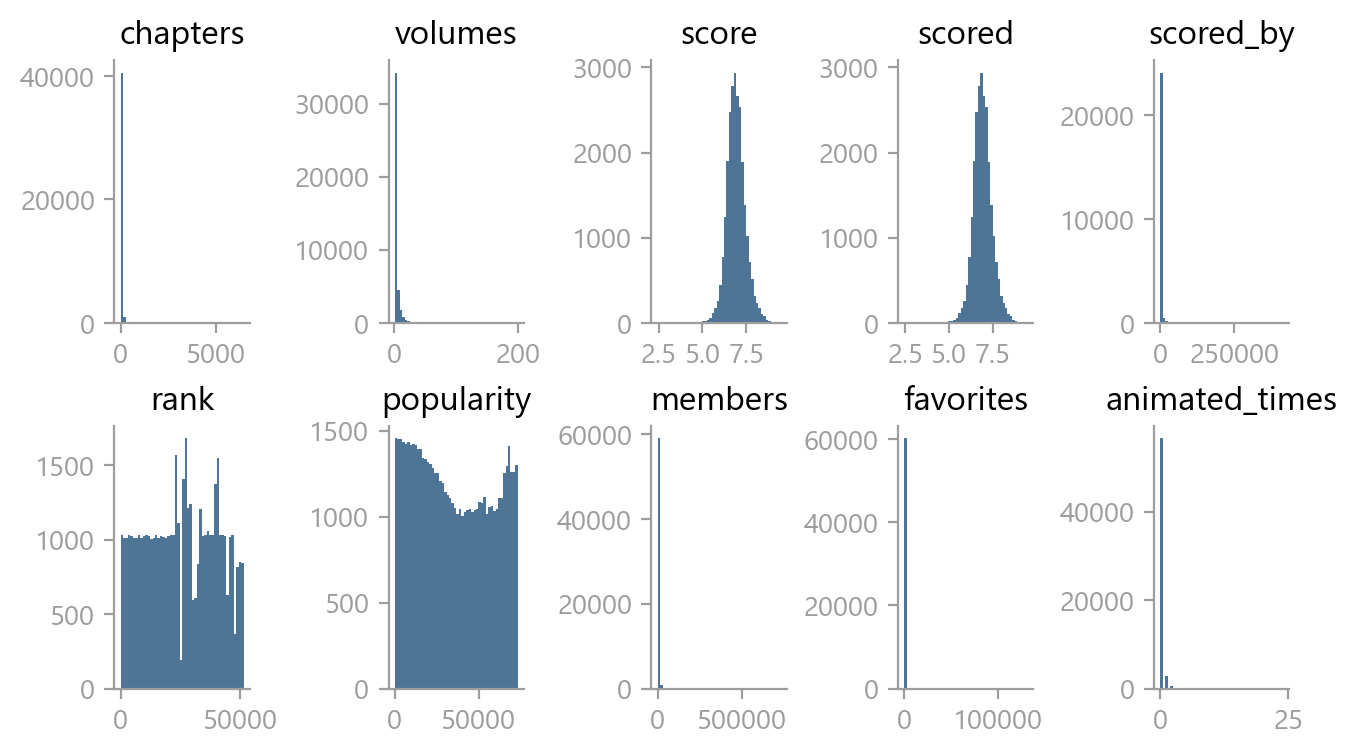

In [20]:
fig, axs = plt.subplots(2, 5, layout='constrained')
iloc_num = 0
manga_num = manga.select_dtypes(include=np.number)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].hist(manga_num.iloc[:, iloc_num], bins=50)
        axs[i][j].set_title(manga_num.columns[iloc_num])
        iloc_num += 1

#### Trend

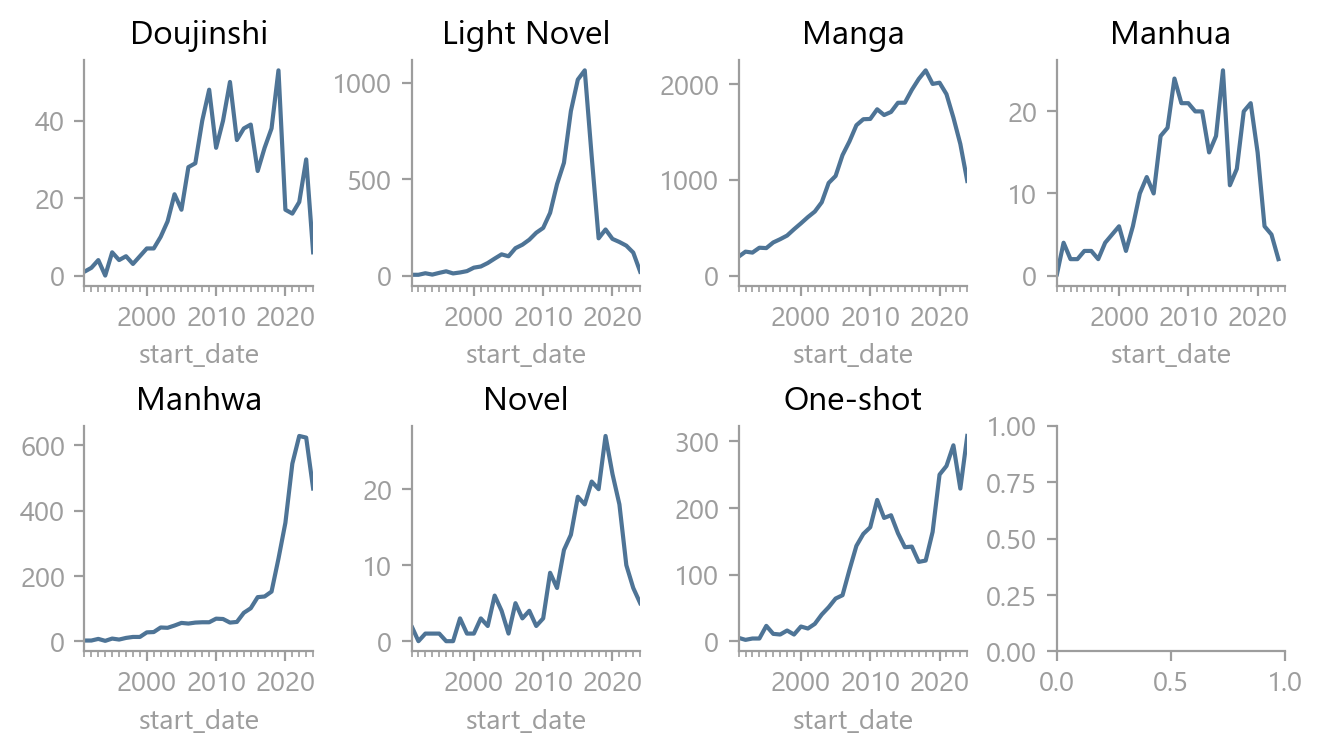

In [21]:
type_list = manga['type'].cat.categories
loop_num = 0
fig, axs = plt.subplots(2, 4, layout='constrained')
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        mask = manga.type == type_list[loop_num]
        manga[mask].resample('YE', on='start_date')['title'].count().plot(ax=axs[i][j])
        axs[i][j].set_xlim(left='1991', right='2024')
        axs[i][j].set_title(type_list[loop_num])
        axs[i][j].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
        loop_num += 1
        if loop_num > len(type_list) -1:
            break

### Slice the data from different dimensions

#### Type of media

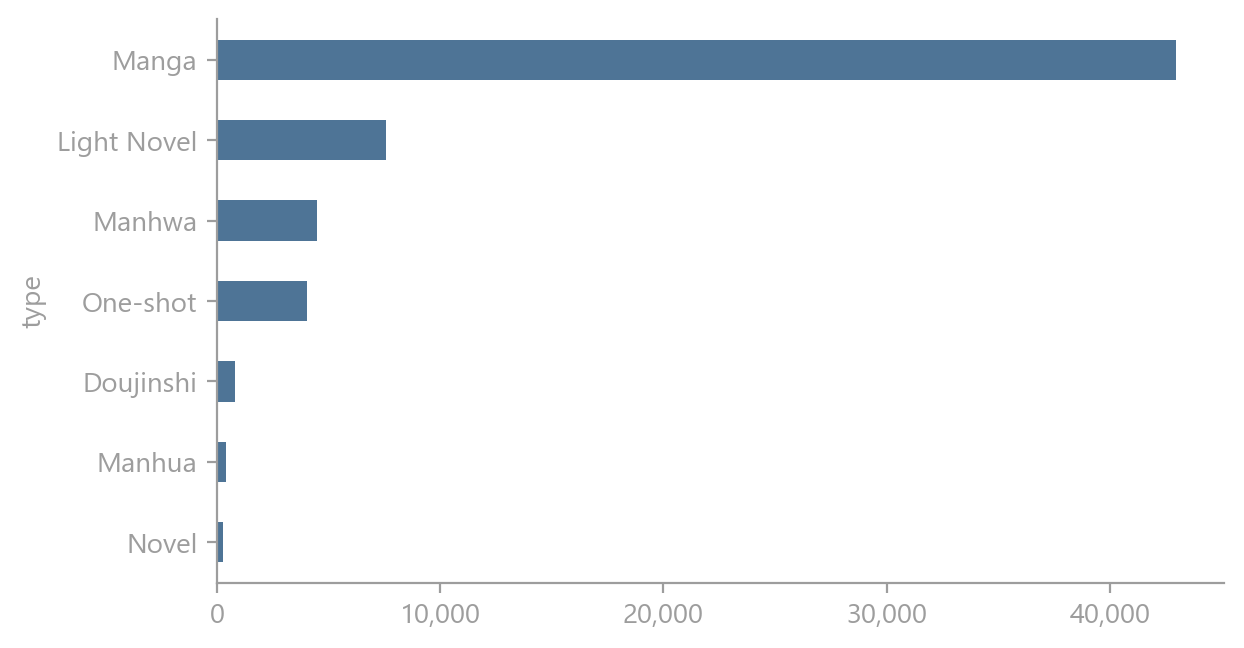

In [22]:
ax = manga['type'].value_counts().plot.barh()
ax.yaxis.set_inverted(True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

<Axes: xlabel='start_date'>

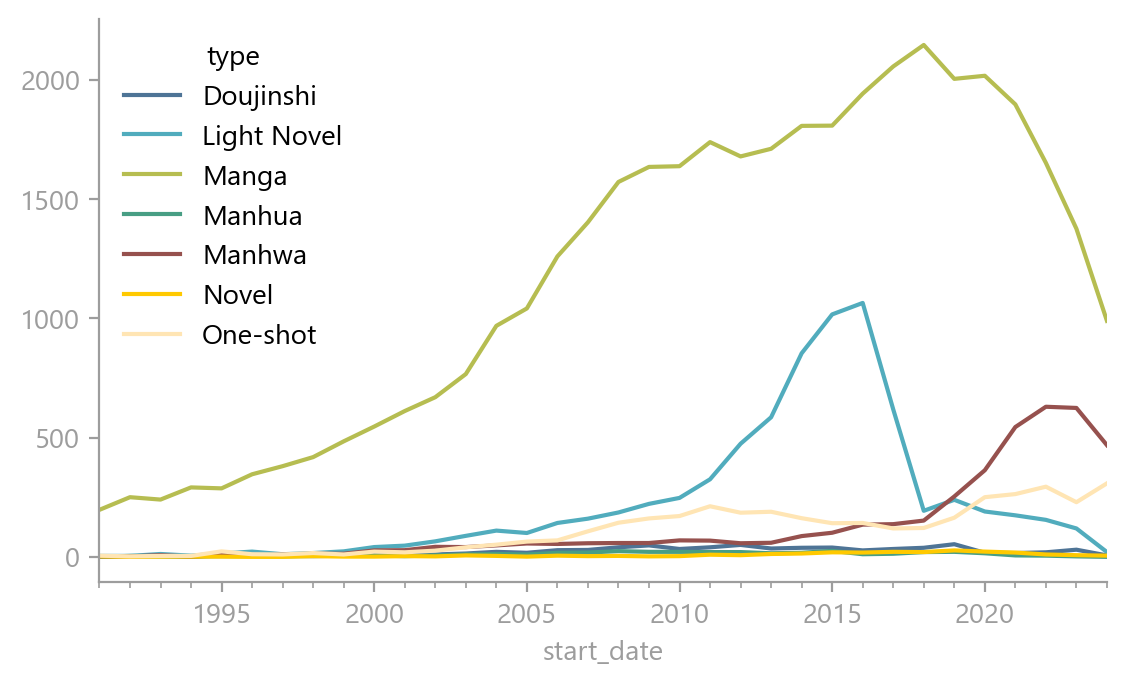

In [23]:
#Use pandas data API
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_type_year = manga.groupby([ts_grouper, 'type'], observed=False)['title'].count()
manga_by_type_year.unstack().loc['1991':'2024'].plot()

<Axes: xlabel='start_date'>

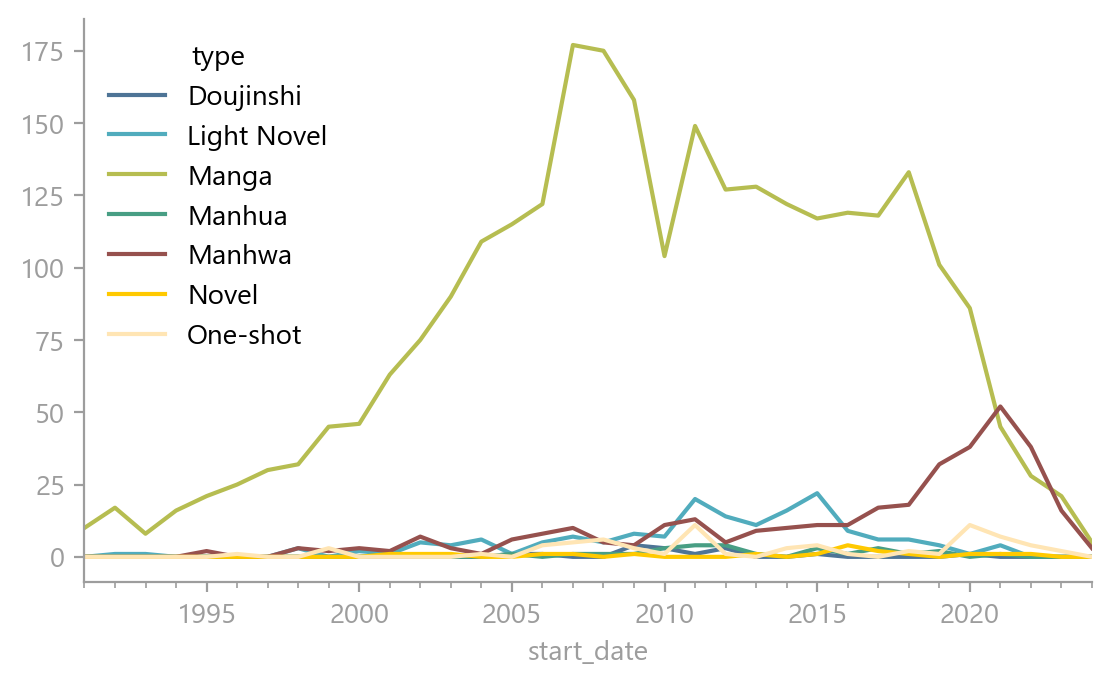

In [24]:
# Check the quality by screening out data with score & scored by below the 75 percentile
mask = (manga['scored_by'] > manga['scored_by'].quantile(0.75)) & (manga['score'] > manga['score'].quantile(0.75))
manga_by_type_year = manga[mask].groupby([ts_grouper, 'type'], observed=False)['title'].count()
manga_by_type_year.unstack().loc['1991':'2024'].plot()

Text(0.5, 1.0, 'Number of Titles from 1991 to 2024')

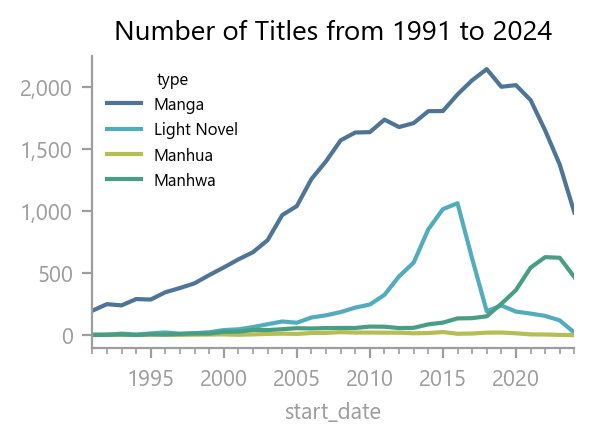

In [25]:
# Use pandas data API
# Presentation
plt.style.use('ppt.mplstyle')
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_type_year = manga.groupby([ts_grouper, 'type'], observed=False)['title'].count()
ax = manga_by_type_year.unstack().loc['1991':'2024', ['Manga', 'Light Novel', 'Manhua', 'Manhwa']].plot()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Number of Titles from 1991 to 2024')

Text(0.5, 1.0, 'Number of Quality Titles from 1991 to 2024')

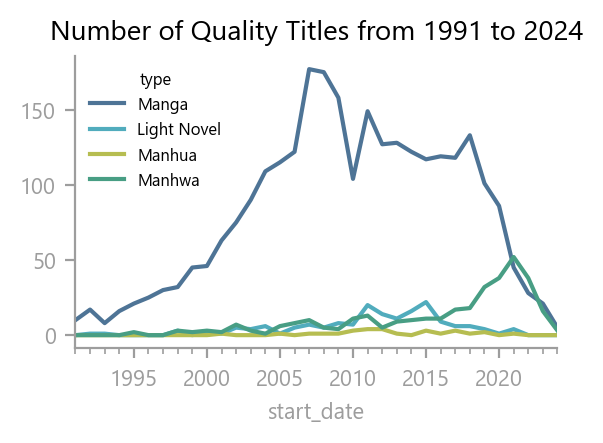

In [26]:
# Use pandas data API
# Presentation
plt.style.use('ppt.mplstyle')
mask = (manga['scored_by'] > manga['scored_by'].quantile(0.75)) & (manga['score'] > manga['score'].quantile(0.75))
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_type_year = manga[mask].groupby([ts_grouper, 'type'], observed=False)['title'].count()
ax = manga_by_type_year.unstack().loc['1991':'2024', ['Manga', 'Light Novel', 'Manhua', 'Manhwa']].plot()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Number of Quality Titles from 1991 to 2024')

Text(0.5, 1.0, 'Number of Quality Titles from 1991 to 2024')

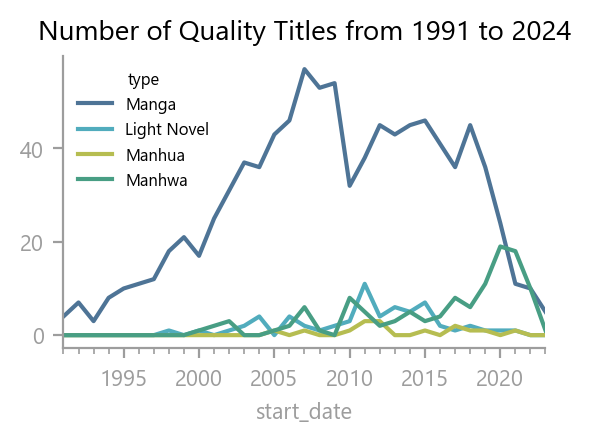

In [27]:
# Use pandas data API
# Presentation
plt.style.use('ppt.mplstyle')
mask = (manga['scored_by'] > manga['scored_by'].quantile(0.9)) & (manga['score'] > manga['score'].quantile(0.9))
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_type_year = manga[mask].groupby([ts_grouper, 'type'], observed=False)['title'].count()
ax = manga_by_type_year.unstack().loc['1991':'2024', ['Manga', 'Light Novel', 'Manhua', 'Manhwa']].plot()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Number of Quality Titles from 1991 to 2024')

#### Serialization

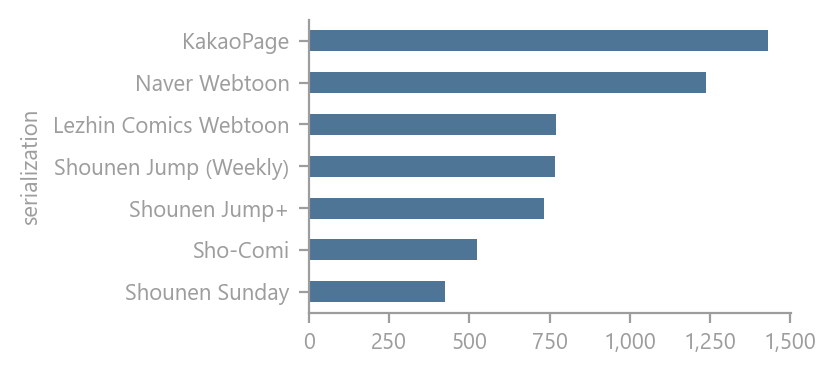

In [28]:
ser_count = manga['serialization'].value_counts()
ax = ser_count[ser_count > 400].plot(kind='barh')
ax.yaxis.set_inverted(True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

<Axes: xlabel='start_date'>

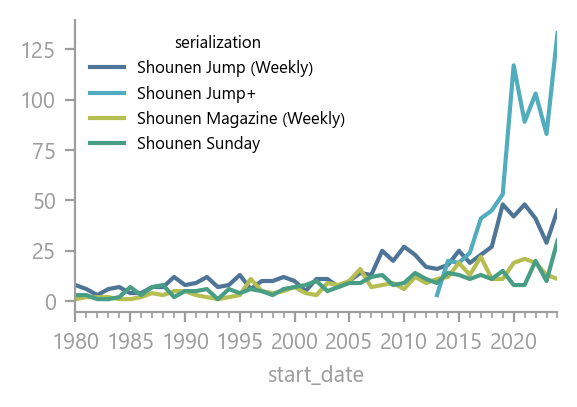

In [29]:
#Compare 3 major shounen magzines
ts_grouper = pd.Grouper(key='start_date', freq='YE')
mask = manga['serialization'].isin(['Shounen Jump (Weekly)', 'Shounen Jump+', 
                                   'Shounen Sunday', 'Shounen Magazine (Weekly)'])
manga_by_type_year = manga[mask].groupby([ts_grouper, 'serialization'])['title'].count()
manga_by_type_year.unstack().loc['1980':'2024'].plot()

<Axes: xlabel='start_date'>

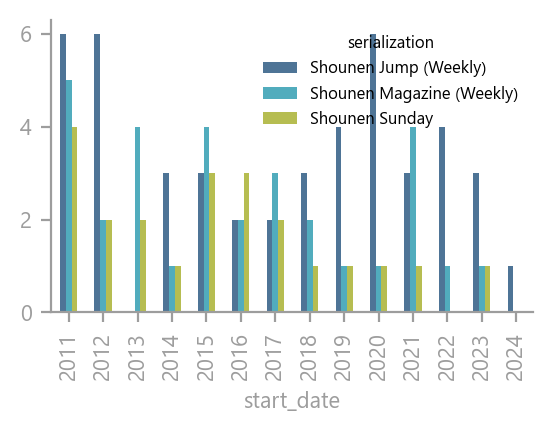

In [30]:
#Compare the quality of the 3 major shounen magzines
ts_grouper = pd.Grouper(key='start_date', freq='YE')
mask = (manga['serialization'].isin(['Shounen Jump (Weekly)', 
                                   'Shounen Sunday', 'Shounen Magazine (Weekly)'])) & (
                                       manga['scored_by'] > manga['scored_by'].quantile(0.75)) & (
                                           manga['score'] > manga['score'].quantile(0.75))
manga_by_type_year = manga[mask].groupby([ts_grouper, 'serialization'])['title'].count().unstack()
manga_by_type_year.index = manga_by_type_year.index.strftime('%Y')
manga_by_type_year.loc['2011':'2024'].plot(kind='bar')

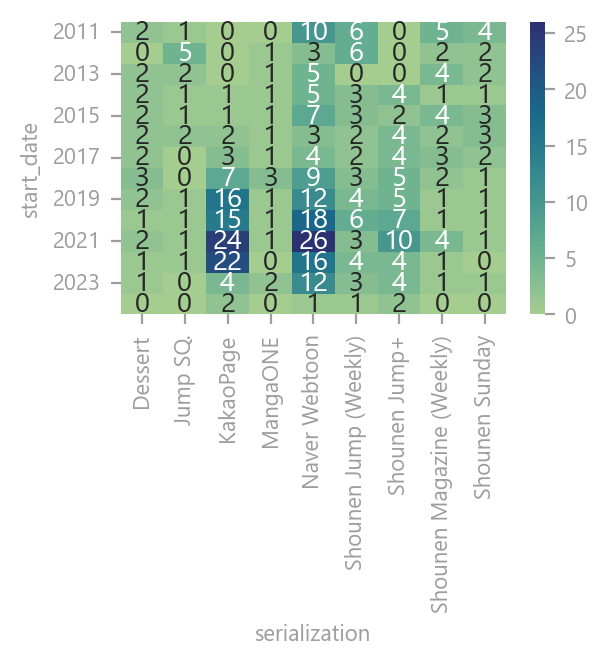

In [31]:
#Compare the quality of the 3 major shounen magzines
ts_grouper = pd.Grouper(key='start_date', freq='YE')
mask = (manga['scored_by'] > manga['scored_by'].quantile(0.75)) & (manga['score'] > manga['score'].quantile(0.75))
manga_by_ser_year = manga[mask].groupby([ts_grouper, 'serialization'])['title'].count().unstack()
manga_by_ser_year = manga_by_ser_year.loc['2011':'2024'].dropna(axis=1, thresh=10)
manga_by_ser_year.index = manga_by_ser_year.index.strftime('%Y')
ax = sns.heatmap(manga_by_ser_year.replace(np.nan, 0), annot=True, cmap='crest')

#### Demographics

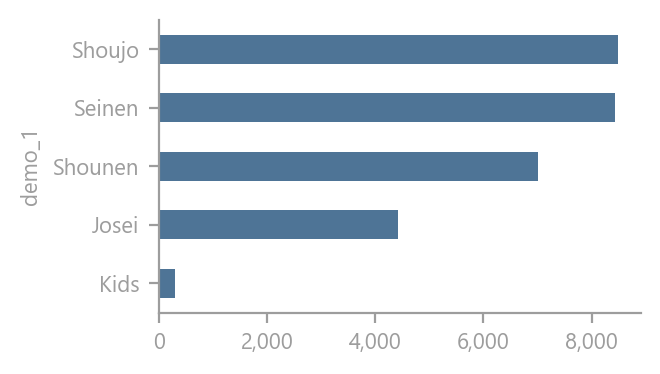

In [32]:
ax = manga['demo_1'].value_counts().plot(kind='barh')
ax.yaxis.set_inverted(True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

<Axes: xlabel='start_date'>

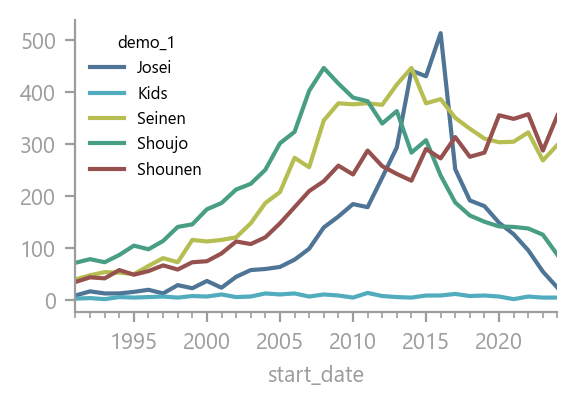

In [33]:
# Use pandas data API
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_demo_year = manga.groupby([ts_grouper, 'demo_1'], observed=False)['title'].count()
manga_by_demo_year.unstack().loc['1991':'2024'].plot()

<Axes: xlabel='start_date'>

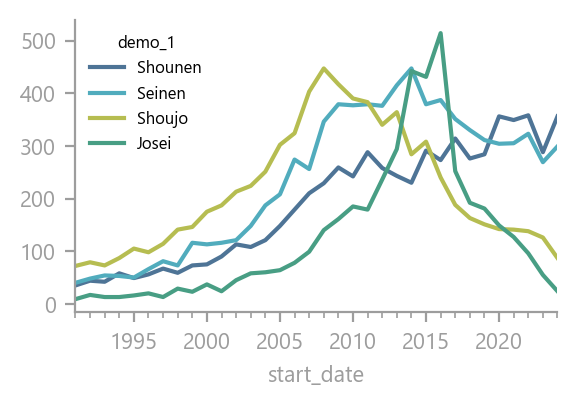

In [90]:
# Presentation
# Use pandas data API
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_demo_year = manga.groupby([ts_grouper, 'demo_1'], observed=False)['title'].count()
manga_by_demo_year.unstack().loc['1991':'2024', ['Shounen', 'Seinen', 'Shoujo', 'Josei']].plot()

Text(0.5, 0, '')

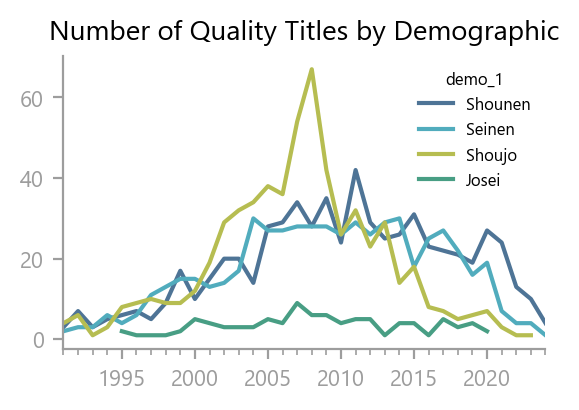

In [103]:
# Presentation
# Use pandas data API
mask = (manga['scored_by'] > manga['scored_by'].quantile(0.75)) & (manga['score'] > manga['score'].quantile(0.75))
ts_grouper = pd.Grouper(key='start_date', freq='YE')
manga_by_demo_year = manga[mask].groupby([ts_grouper, 'demo_1'], observed=False)['title'].count()
ax = manga_by_demo_year.unstack().loc['1991':'2024', ['Shounen', 'Seinen', 'Shoujo', 'Josei']].plot()
ax.set_title('Number of Quality Titles by Demographic')
ax.set_xlabel(None)

<Axes: xlabel='start_date'>

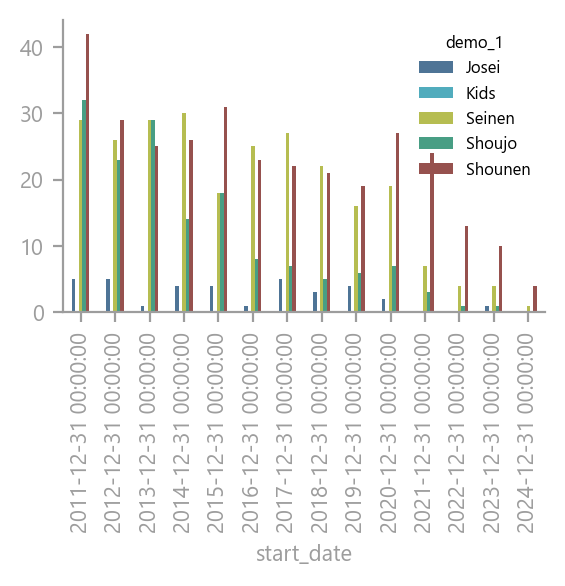

In [34]:
mask = (manga['scored_by'] > manga['scored_by'].quantile(0.75)) & (manga['score'] > manga['score'].quantile(0.75))
manga_by_type_year = manga[mask].groupby([ts_grouper, 'demo_1'], observed=False)['title'].count()
manga_by_type_year.unstack().loc['2011':'2024'].plot(kind='bar')

#### Genre

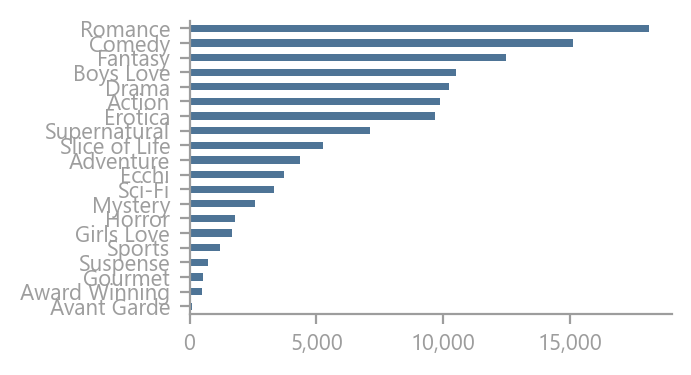

In [35]:
ax = genre.stack().value_counts().plot(kind='barh')
ax.yaxis.set_inverted(True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#### Theme

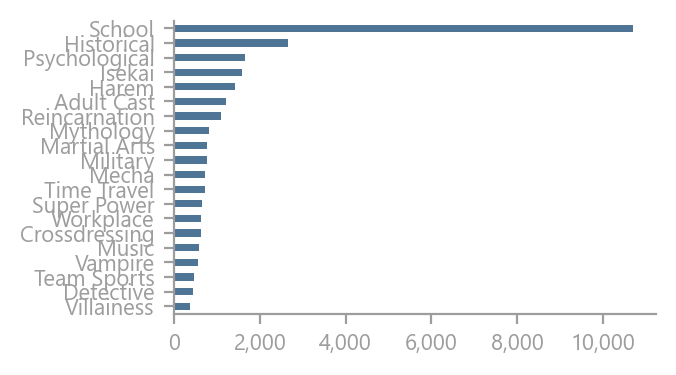

In [36]:
ax = theme.stack().value_counts().head(20).plot(kind='barh')
ax.yaxis.set_inverted(True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#### Animated times

Text(0, 0.5, '')

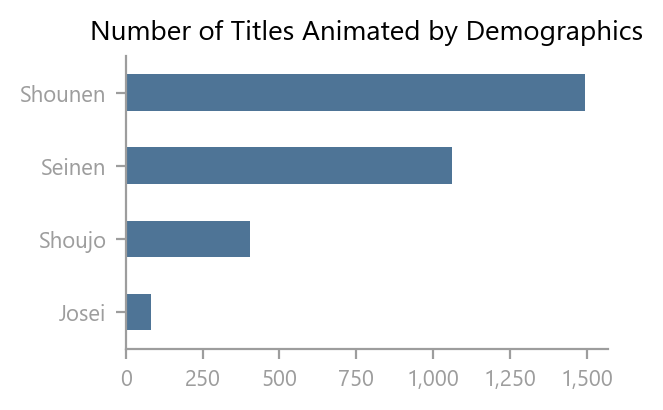

In [ ]:
ax = manga.groupby('demo_1')['animated_times'].sum().sort_values(ascending=False).loc[['Shounen', 'Seinen', 'Shoujo', 'Josei']].plot.barh()
ax.yaxis.set_inverted(True)
ax.set_title('Number of Titles Animated by Demographics')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel(None)

Text(0, 0.5, '')

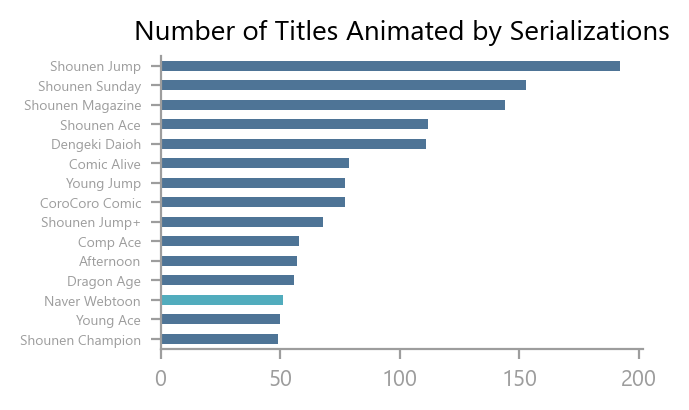

In [76]:
# Presentation
plt.style.use('ppt.mplstyle')
ax = manga.groupby('serialization')['animated_times'].sum().sort_values(
    ascending=False).head(15).plot.barh(color=['C0']*12+['C1']+['C0']*2)
ax.yaxis.set_inverted(True)
ax.yaxis.set_ticklabels(labels=['Shounen Jump', 'Shounen Sunday', 'Shounen Magazine', 'Shounen Ace',
                                'Dengeki Daioh', 'Comic Alive', 'Young Jump', 'CoroCoro Comic',
                                'Shounen Jump+', 'Comp Ace', 'Afternoon', 'Dragon Age', 'Naver Webtoon',
                                'Young Ace', 'Shounen Champion'], fontdict={'fontsize':5})
ax.set_title('Number of Titles Animated by Serializations')
ax.set_ylabel(None)

C:\Users\Shih\AppData\Local\Temp\ipykernel_16476\360395638.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = manga.groupby('type')['animated_times'].sum().loc[['Manga', 'Light Novel', 'Manhua', 'Manhwa']].sort_values(


Text(0.5, 1.0, 'Number of Titles Animated by Media Type')

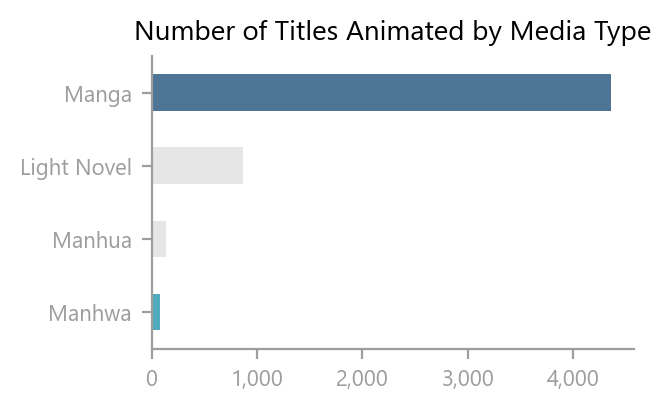

In [77]:
# Presentation
ax = manga.groupby('type')['animated_times'].sum().loc[['Manga', 'Light Novel', 'Manhua', 'Manhwa']].sort_values(
    ascending=False).plot.barh(color=['C0']+['0.9']*2+['C1'])
ax.yaxis.set_inverted(True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel(None)
ax.set_title('Number of Titles Animated by Media Type')

## Data Wrangling

In [40]:
genre_str = []
for row in range(len(genre.index)):
    gen = genre.iloc[row, :].str.cat(sep='|')
    genre_str.append(gen)
gen_s = pd.Series(genre_str, index=genre.index)
genre_one_hot = gen_s.str.get_dummies()
genre_one_hot

,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
mal_id,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148084,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
148085,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
148086,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [41]:
theme_str = []
for row in range(len(theme.index)):
    the = theme.iloc[row, :].str.cat(sep='|')
    theme_str.append(the)
the_s = pd.Series(theme_str, index=theme.index)
theme_one_hot = the_s.str.get_dummies()
theme_one_hot.head(10)

,Adult Cast,Anthropomorphic,CGDCT,Childcare,Combat Sports,Crossdressing,Delinquents,Detective,Educational,Gag Humor,...,Super Power,Survival,Team Sports,Time Travel,Urban Fantasy,Vampire,Video Game,Villainess,Visual Arts,Workplace
mal_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
manga_model = genre_one_hot.merge(theme_one_hot.
                    merge(pd.get_dummies(manga[['type', 'publishing']]).
                          merge(manga.select_dtypes(include=[np.number, 'bool']), 
                                left_index=True, right_index=True), 
                          left_index=True, right_index=True), 
                    left_index=True, right_index=True)
manga_model.shape

(60509, 93)

Text(0, 0.5, '')

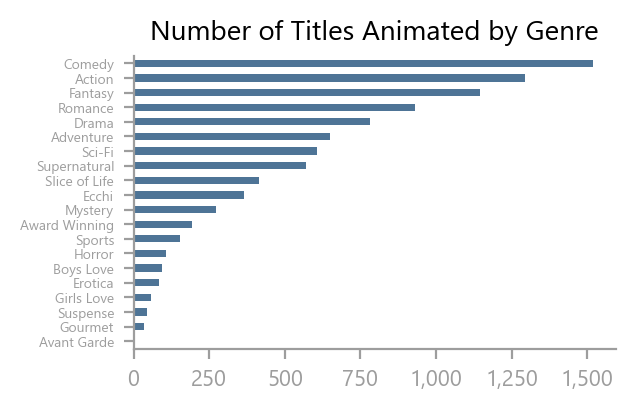

In [ ]:
# Presentation
ax = (manga_model.groupby('animated')[['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love',
       'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love',
       'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life',
       'Sports', 'Supernatural', 'Suspense']].sum()).iloc[1, :].sort_values(ascending=False).plot.barh()
ax.yaxis.set_inverted(True)
ax.yaxis.set_ticklabels(labels=['Comedy', 'Action', 'Fantasy', 'Romance', 'Drama', 'Adventure', 'Sci-Fi',
                                'Supernatural', 'Slice of Life', 'Ecchi', 'Mystery', 'Award Winning', 'Sports',
                                'Horror', 'Boys Love', 'Erotica', 'Girls Love', 'Suspense', 'Gourmet', 'Avant Garde'], fontdict={'fontsize':5})
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Number of Titles Animated by Genre')
ax.set_ylabel(None)

Text(0, 0.5, '')

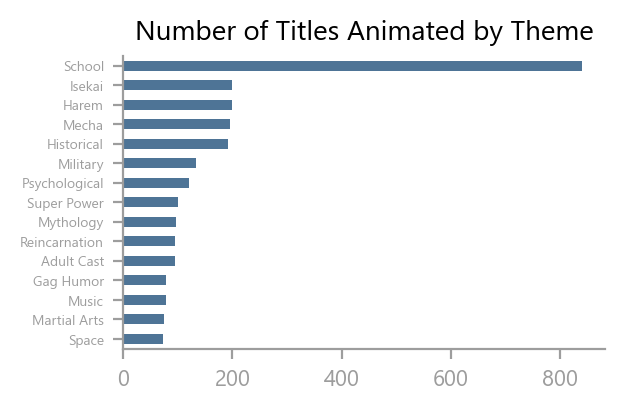

In [ ]:
# Presentation
ax = (manga_model.groupby('animated')[['Adult Cast', 'Anthropomorphic',
       'CGDCT', 'Childcare', 'Combat Sports', 'Crossdressing', 'Delinquents',
       'Detective', 'Educational', 'Gag Humor', 'Gore', 'Harem',
       'High Stakes Game', 'Historical', 'Idols (Female)', 'Idols (Male)',
       'Isekai', 'Iyashikei', 'Love Polygon', 'Love Status Quo',
       'Magical Sex Shift', 'Mahou Shoujo', 'Martial Arts', 'Mecha', 'Medical',
       'Memoir', 'Military', 'Music', 'Mythology', 'Organized Crime',
       'Otaku Culture', 'Parody', 'Performing Arts', 'Pets', 'Psychological',
       'Racing', 'Reincarnation', 'Reverse Harem', 'Samurai', 'School',
       'Showbiz', 'Space', 'Strategy Game', 'Super Power', 'Survival',
       'Team Sports', 'Time Travel', 'Urban Fantasy', 'Vampire', 'Video Game',
       'Villainess', 'Visual Arts', 'Workplace']].sum()).iloc[1, :].sort_values(ascending=False).head(15).plot.barh()
ax.yaxis.set_inverted(True)
ax.yaxis.set_ticklabels(labels=['School', 'Isekai', 'Harem', 'Mecha', 'Historical', 'Military', 'Psychological',
                                'Super Power', 'Mythology', 'Reincarnation', 'Adult Cast', 'Gag Humor', 'Music',
                                'Martial Arts', 'Space'], fontdict={'fontsize':5})
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Number of Titles Animated by Theme')
ax.set_ylabel(None)

## Model Building

### Data Preparation

#### Resampling

In [104]:
manga_model.columns

Index(['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love',
       'Comedy', 'Drama', 'Ecchi', 'Erotica', 'Fantasy', 'Girls Love',
       'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life',
       'Sports', 'Supernatural', 'Suspense', 'Adult Cast', 'Anthropomorphic',
       'CGDCT', 'Childcare', 'Combat Sports', 'Crossdressing', 'Delinquents',
       'Detective', 'Educational', 'Gag Humor', 'Gore', 'Harem',
       'High Stakes Game', 'Historical', 'Idols (Female)', 'Idols (Male)',
       'Isekai', 'Iyashikei', 'Love Polygon', 'Love Status Quo',
       'Magical Sex Shift', 'Mahou Shoujo', 'Martial Arts', 'Mecha', 'Medical',
       'Memoir', 'Military', 'Music', 'Mythology', 'Organized Crime',
       'Otaku Culture', 'Parody', 'Performing Arts', 'Pets', 'Psychological',
       'Racing', 'Reincarnation', 'Reverse Harem', 'Samurai', 'School',
       'Showbiz', 'Space', 'Strategy Game', 'Super Power', 'Survival',
       'Team Sports', 'Time Travel', 'Urban F

In [105]:
# Target variable is animated, so drop animated times
manga_model = manga_model.loc[:, ~ manga_model.columns.isin(['publishing_x', 'publishing_y', 'animated_times'])]

In [106]:
manga_model = manga_model.dropna(how='any')
manga_model.shape

(12777, 90)

In [107]:
y = manga_model['animated']
X = manga_model.loc[:, manga_model.columns != 'animated']

In [108]:
y.value_counts()

animated
False    11244
True      1533
Name: count, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
# downsampling the class 0 (not animated)
from sklearn.utils import resample

manga_train = X_train.merge(y_train, left_index=True, right_index=True)
manga_0 = manga_train[manga_train.animated == 0]
manga_1 = manga_train[manga_train.animated == 1]
manga_0 = resample(manga_0, n_samples=y_train.value_counts()[1], random_state=42)
manga_train = pd.concat([manga_1, manga_0])
manga_train.shape


C:\Users\Shih\AppData\Local\Temp\ipykernel_16476\1271045348.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  manga_0 = resample(manga_0, n_samples=y_train.value_counts()[1], random_state=42)


(2320, 90)

In [111]:
y_train = manga_train['animated']
X_train = manga_train.loc[:, manga_train.columns != 'animated']

### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print(f'Training set score: {logreg.score(X_train, y_train)}')
print(f'Test set score: {logreg.score(X_test, y_test)}')

Training set score: 0.6905172413793104
Test set score: 0.6964006259780907


c:\Users\Shih\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.6964006259780907
[[1987  835]
 [ 135  238]]
              precision    recall  f1-score   support

       False       0.94      0.70      0.80      2822
        True       0.22      0.64      0.33       373

    accuracy                           0.70      3195
   macro avg       0.58      0.67      0.57      3195
weighted avg       0.85      0.70      0.75      3195



In [114]:
pd.Series(dict(zip(logreg.feature_names_in_, logreg.coef_[0]))).sort_values(ascending=False)

volumes        7.39e-02
scored         2.00e-02
score          2.00e-02
Action         1.33e-02
Sci-Fi         1.30e-02
                 ...   
type_Manga    -2.00e-03
type_Manhwa   -3.35e-03
School        -3.72e-03
Boys Love     -3.86e-03
Romance       -5.35e-03
Length: 89, dtype: float64

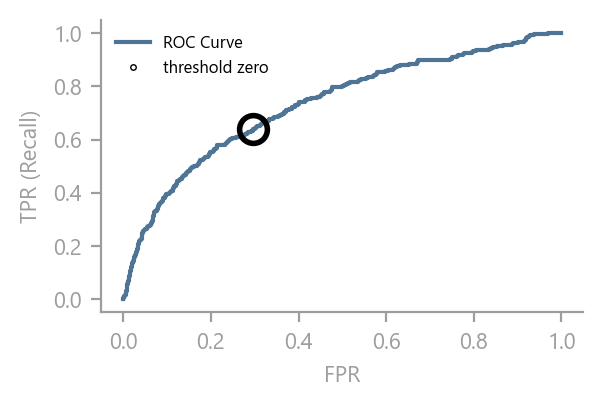

In [115]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, logreg.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', label='threshold zero', markersize=10, 
         fillstyle='none', c='k', mew=2)
plt.legend()

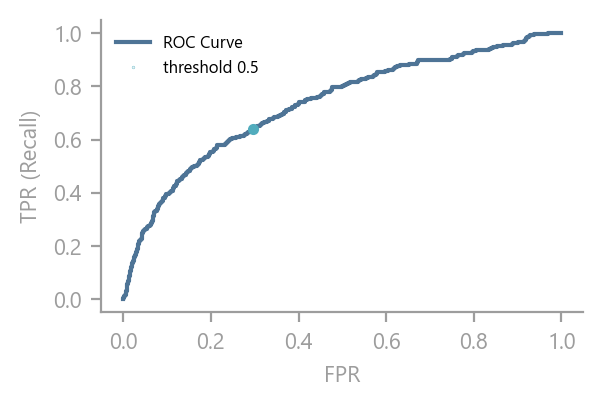

In [126]:
fpr, tpr, threshold = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
close_default = np.argmin(np.abs(threshold - 0.5))
plt.plot(fpr[close_default], tpr[close_default], '.', label='threshold 0.5', markersize=6, 
         c='C1')
plt.legend()

In [127]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score for logreg: {auc}')

ROC AUC Score for logreg: 0.7329038595637875


Training set score of C = 0.001: 0.6918103448275862
Testing set score of C = 0.001: 0.7004694835680751
Training set score of C = 1: 0.6905172413793104
Testing set score of C = 1: 0.6964006259780907
Training set score of C = 100: 0.6896551724137931
Testing set score of C = 100: 0.6964006259780907


c:\Users\Shih\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Shih\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

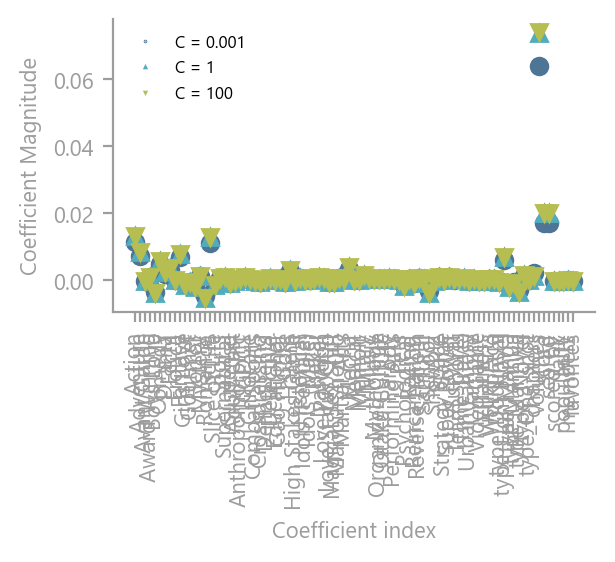

In [128]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr = LogisticRegression(C=C).fit(X_train, y_train)
    print(f'Training set score of C = {C}: {lr.score(X_train, y_train)}')
    print(f'Testing set score of C = {C}: {lr.score(X_test, y_test)}')
    plt.plot(lr.coef_.T, marker, label=f'C = {C}')
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=90)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Magnitude')
plt.legend()  

### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42).fit(X_train, y_train)
print(f'Training set score: {rf.score(X_train, y_train)}')
print(f'Testing set score: {rf.score(X_test, y_test)}')

Training set score: 1.0
Testing set score: 0.7230046948356808


In [148]:
pd.Series(dict(zip(rf.feature_names_in_, rf.feature_importances_))).sort_values(ascending=False).head(10)

In [131]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.7230046948356808
[[2024  798]
 [  87  286]]
              precision    recall  f1-score   support

       False       0.96      0.72      0.82      2822
        True       0.26      0.77      0.39       373

    accuracy                           0.72      3195
   macro avg       0.61      0.74      0.61      3195
weighted avg       0.88      0.72      0.77      3195



Text(0.5, 1.0, 'ROC Curve for Random Forest')

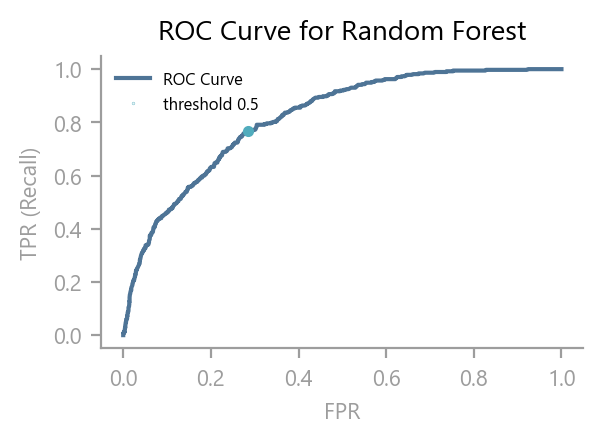

In [147]:
fpr, tpr, threshold = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
close_default = np.argmin(np.abs(threshold - 0.5))
plt.plot(fpr[close_default], tpr[close_default], '.', label='threshold 0.5', markersize=6, 
         c='C1')
plt.legend()
plt.title('ROC Curve for Random Forest')

In [140]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score for rf: {auc}')

ROC AUC Score for rf: 0.8172811099309714


### Gradient Boost

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42, max_depth=1).fit(X_train, y_train)
print(f'Training set score: {gbc.score(X_train, y_train)}')
print(f'Testing set score: {gbc.score(X_test, y_test)}')

Training set score: 0.7478448275862069
Testing set score: 0.7267605633802817


In [136]:
y_pred = gbc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.7267605633802817
[[2070  752]
 [ 121  252]]
              precision    recall  f1-score   support

       False       0.94      0.73      0.83      2822
        True       0.25      0.68      0.37       373

    accuracy                           0.73      3195
   macro avg       0.60      0.70      0.60      3195
weighted avg       0.86      0.73      0.77      3195



In [141]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score for gbc: {auc}')

ROC AUC Score for gbc: 0.7965587313771725


### Kernelized SVM

In [137]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print(f'Training set score: {svc.score(X_train, y_train)}')
print(f'Testing set score: {svc.score(X_test, y_test)}')

Training set score: 0.6504310344827586
Testing set score: 0.7098591549295775


In [138]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.7098591549295775
[[2058  764]
 [ 163  210]]
              precision    recall  f1-score   support

       False       0.93      0.73      0.82      2822
        True       0.22      0.56      0.31       373

    accuracy                           0.71      3195
   macro avg       0.57      0.65      0.56      3195
weighted avg       0.84      0.71      0.76      3195

